<a href="https://colab.research.google.com/github/marianegri/Python_DataScience_MachineLearning/blob/main/Pre-processamento/Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizado de maquina sobre textos
Uma area do Processamento de Linguagem Natural (PLN):
- Computação
- IA
- linguistica

- **BAG OF WORDS**: Conjunto de palavras / vetor de palavras

- **STOP WORDS**: Conjunto de palavras que sem elas o texto não perde o sentido. Palavras que não agregam semântica no texto.

- **CORPUS LINGUISTICO**: Fonte de texto, como um dicionário. 

- **FILTROS COMUNS**: Remover pontuações, remover stop words

- **STEMMING**: Normalização. abreviar as palavras, levar pra algo proximo do radical

- **WORD COUNT**: Contagem de palavras. frequencia que uma certa palavra aparece

- **TERM FREQUENCY**: $TF_{i,j}$ :  i é a palavra, j o documento. é a porcetagem de aparição de uma certa palavra.

 $TF_{i,j} = \frac{quantidade Mesma Palavra}{quantidade Total de Palavras}$

- **DOCUMENT FREQUENCY**: $dF_i$:  Quantidade de documentos que aquela palavra aparece

- **TF-IDF**: Medida de importância daquela palavra daquele documento dentro do conjunto de documentos

 $TF_{IDF} = TF_{i,j} . log_{10}(1+\frac{N}{dF_i})$

  N: quantidade de documentos

- **Vetorização**\
Criar uma matriz sendo as linhas (indices) as palavras / as colunas os documentos e os valores nas celulas a **WORD COUNT** ou **$TF_{i,j}$** de cada palavra em cada texto

In [69]:
import pandas as pd
import numpy as np

In [70]:
ms = pd.read_csv('SPAM.csv', sep='\t', header = None)
ms.columns = ['LABEL', 'MENSAGEM']
ms.head()

,LABEL,MENSAGEM
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [71]:
ms['TAMANHO_MS'] = ms['MENSAGEM'].apply(len)
ms.head()

,LABEL,MENSAGEM,TAMANHO_MS
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [72]:
ms['TOTAL_PALAVRAS'] = ms['MENSAGEM'].str.split().str.len()
ms.head()

,LABEL,MENSAGEM,TAMANHO_MS,TOTAL_PALAVRAS
0,ham,"Go until jurong point, crazy.. Available only ...",111,20
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,ham,U dun say so early hor... U c already then say...,49,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,13


In [73]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [74]:
# Setup
!pip install -q wordcloud

import wordcloud

import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')[0:5]

from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [75]:
# FUNÇÃO QUE APLICA AS TRANSFORMAÇÕES NO TEXTO
def transfTexto(msg):
    
    # PARA CADA CARACTERE DA MENSAGEM FILTRA PONTUAÇÕES (not in string.punctuation)
    semPont = [char for char in msg if char not in string.punctuation]

    # JUNTA OS CARACTERES NOVAMENTE
    semPont = ''.join(semPont)
    
    # REMOVE STOP WORDS
    remStWords = [palavra for palavra in semPont.split() if palavra.lower() 
                  not in stopwords.words('english')]
    
    # NORMALIZA POR STEMMING E RETORNA O RESULTADO
    st = PorterStemmer()
    return [st.stem(stPalavra) for stPalavra in remStWords]

In [76]:
# APLICANDO A FUNÇÃO DE TRANSFORMAÇÃO
ms['MENSAGEM'].apply(transfTexto).head()

0    [go, jurong, point, crazi, avail, bugi, n, gre...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entri, 2, wkli, comp, win, fa, cup, fin...
3        [u, dun, say, earli, hor, u, c, alreadi, say]
4    [nah, dont, think, goe, usf, live, around, tho...
Name: MENSAGEM, dtype: object

In [77]:
from sklearn.feature_extraction.text import CountVectorizer

# FITANDO UM OBJETO VETORIZADOR DE WORDCOUNT
vetorizadorWC = CountVectorizer(analyzer=transfTexto).fit(ms['MENSAGEM'])

# VETORIZANDO AS MENSAGENS
msVetWC = vetorizadorWC.transform(ms['MENSAGEM'])

# PRIMEIRO É PRECISO TRANSFORMAR EM DATAFRAME A MATRIZ ESPARSA (OBJETO COMPACTADO)
msVetWCPandas = pd.DataFrame(msVetWC.todense(), columns=vetorizadorWC.get_feature_names())

# CONCATENANDO... (msWC = MENSAGENS USANDO WORD COUNT)
msWC = pd.concat([ms['LABEL'], msVetWCPandas], axis=1)

msWC.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,LABEL,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,£s,»10,é,ü,üll,–,“,“harri,…,…thank
0,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
## Vetorização do texto para TF-IDF
from sklearn.feature_extraction.text import TfidfTransformer

# CRIANDO O OBJETO VETORIZADOR
vetorizadorTFIDF = TfidfTransformer().fit(msVetWC)

# VETORIZANDO...
msVetTFIDF = vetorizadorTFIDF.transform(msVetWC)

# FORMATO
msVetTFIDF.shape

(5572, 8195)

In [79]:
# PRIMEIRO É PRECISO TRANSFORMAR EM DATAFRAME A MATRIZ ESPARSA (OBJETO COMPACTADO)
msVetTFIDFPandas = pd.DataFrame(msVetTFIDF.todense(), columns=vetorizadorWC.get_feature_names())

# CONCATENANDO... (msTFIDF = MENSAGENS USANDO TFIDF)
msTFIDF = pd.concat([ms['LABEL'], msVetTFIDFPandas], axis=1)

msTFIDF.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,LABEL,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,...,£s,»10,é,ü,üll,–,“,“harri,…,…thank
0,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,spam,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ham,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [80]:
# DEFINIMOS COMO INDICE OS TERMOS (BUSCAMOS DO OBJETO TREINADO ANTERIORMENTE NO WC)
msTFIDF = pd.DataFrame(vetorizadorTFIDF.idf_, index=vetorizadorWC.get_feature_names(),columns=['TF-IDF'])
 
# TEMOS UM VALORE DE TF-IDF PARA CADA TEMRO DISTINTO DO CORPUS...
msTFIDF.sort_values(by=['TF-IDF'], ascending = False).head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,TF-IDF
judgementali,8.932542
meso,8.932542
meremov,8.932542
merememberin,8.932542
mere,8.932542


# Exercício

In [81]:
from sklearn.metrics import confusion_matrix, classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [82]:
## COMENTARIO 0 : MENSAGENS 
cmt_0 = pd.read_csv('COMENTARIOS_0.csv', delimiter=',')
cmt_0.head()

,label,comment,author,subreddit,score,date,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...


In [83]:
## COMENTARIO 1 : MENSAGENS SARCASTICAS
cmt_1 = pd.read_csv('COMENTARIOS_1.csv', delimiter=',')
cmt_1.head()

,label,comment,author,subreddit,score,date,parent_comment
0,1,But they'll have all those reviews!,RoguishPoppet,ProductTesting,0.0,2016-11,"The dumb thing is, they are risking their sell..."
1,1,wow it is totally unreasonable to assume that ...,pb2crazy,politics,2.0,2016-11,Clinton campaign accuses FBI of 'blatant doubl...
2,1,Ho ho ho... But Melania said that there is no ...,pb2crazy,politics,8.0,2016-10,Anyone else think that it was interesting the ...
3,1,I can't wait until @potus starts a twitter war...,kitduncan,politics,3.0,2016-11,Here's what happens when Obama gives up his Tw...
4,1,gotta love the teachers who give exams on the ...,DEP61,CFBOffTopic,3.0,2016-11,Monday night Drinking thread Brought to You by...


2. Os comentários normais estão no arquivo de sufixo _0 e os sarcásticos estão no _1. Concatene
ambos para obter apenas um dataframe completo.

In [84]:
cmt = pd.concat([cmt_0, cmt_1], axis = 0)
cmt.head()

,label,comment,author,subreddit,score,date,parent_comment
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...


3. Há outliers na variável
score
. Trate-os substituindo pela média dos não outliers da série;

In [85]:
cmt['score'].min()

-507.0

In [86]:
cmt['score'].max()

9999999.0

In [87]:
cmt['score'] = np.where((cmt['score']< cmt['score'].quantile(0.01))|
                        (cmt['score']> cmt['score'].quantile(0.99)),

                        ((cmt['score']> cmt['score'].quantile(0.01))&
                        (cmt['score']< cmt['score'].quantile(0.99))).mean(),

                        cmt['score']
                        )

In [88]:
cmt['score'].max()

88.0

In [89]:
cmt['score'].min()

-9.0

4. Há valores ausentes nas variáveis
subreddit e score. Analise os dados e trate da forma que você julgar melhor, usando alguma das técnicas que aprendemos em aula;

In [90]:
cmt['score'].fillna(value=0)
cmt['subreddit'].fillna(value=0)

0                   politics
1                        nba
2                        nfl
3         BlackPeopleTwitter
4         MaddenUltimateTeam
                 ...        
505408            reddit.com
505409               climate
505410               atheism
505411             worldnews
505412              politics
Name: subreddit, Length: 1010826, dtype: object

5. 
a. comment_wcount
: quantidade de palavras contidas na variável
comment


In [91]:
# Contando o numero de palavras
cmt['comment_wcount'] = cmt['comment'].str.split().str.len()
cmt['parent_comment_wcount'] = cmt['parent_comment'].str.split().str.len()

In [92]:
#convertendo 'comment' de objeto para string
cmt['comment'] = cmt['comment'].astype(str)

In [93]:
# Contando o numero de caracteres
cmt['comment_char'] = cmt['comment'].apply(len)
cmt['parent_comment_char'] = cmt['parent_comment'].apply(len)

In [94]:
cmt.head()

,label,comment,author,subreddit,score,date,parent_comment,comment_wcount,parent_comment_wcount,comment_char,parent_comment_char
0,0,NC and NH.,Trumpbart,politics,2.0,2016-10,"Yeah, I get that argument. At this point, I'd ...",3.0,17,10,80
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4.0,2016-11,The blazers and Mavericks (The wests 5 and 6 s...,14.0,27,74,134
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3.0,2016-09,They're favored to win.,19.0,4,121,23
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8.0,2016-10,deadass don't kill my buzz,12.0,5,60,26
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6.0,2016-12,Yep can confirm I saw the tool they use for th...,7.0,18,31,85


### Análise de dados (preliminar)

1. Percentualmente, qual o volume de comentários sarcásticos?

In [95]:
percentual = pd.DataFrame()
percentual['qtd'] = cmt.groupby('label')['label'].count()
percentual['%'] = round((percentual['qtd']/percentual['qtd'].sum())*100, 2)
percentual.head()

,qtd,%
label,,
0,505413,50.0
1,505413,50.0


2. Qual o autor que mais comenta com sarcasmo?

In [96]:
cmt[cmt['label'] == 1].groupby('author')['label'].count().sort_values(ascending=False).head()

author
Biffingston       422
pokemon_fetish    216
NeonDisease       211
ShyBiDude89       202
ivsciguy          171
Name: label, dtype: int64

3. Percentualmente, ao longo do tempo os comentários
sarcásticos tem aumentado ou diminuído?
Plote um gráfico de sua preferência para mostrar a evolução.

In [97]:
percent_mes = pd.DataFrame()
percent_mes['qtd'] = cmt[cmt['label'] == 1].groupby('date')['date'].count()
percent_mes['%'] = round((percent_mes['qtd']/cmt.groupby('date')['date'].count())*100, 2)
percent_mes.head()

,qtd,%
date,,
2009-01,72,69.23
2009-02,57,64.04
2009-03,70,66.67
2009-04,71,58.20
2009-05,68,61.82


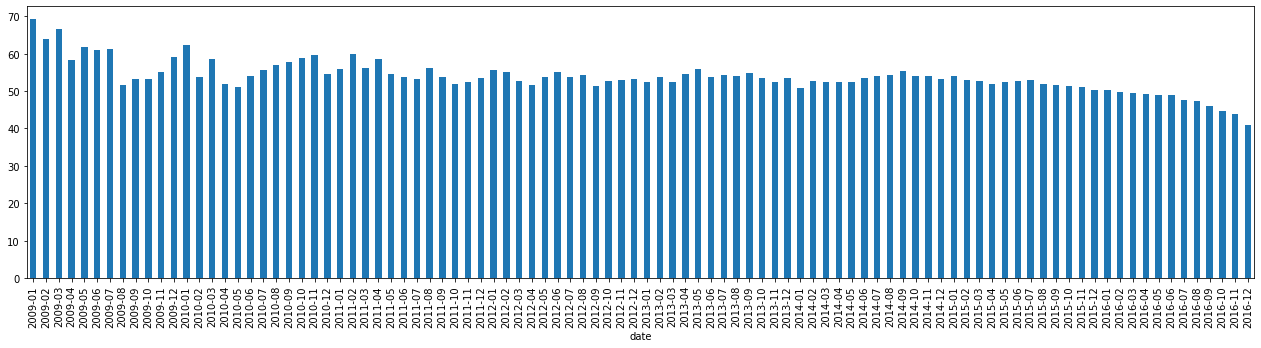

In [98]:
plt.figure(figsize=(22,5))
percent_mes['%'].plot.bar()

4. Percentualmente, olhando a variável
subreddit
, qual o assunto que mais gera comentários
sarcásticos?
Considere apenas assuntos com mais de 100
0
comentários.

In [99]:
teste = pd.DataFrame()
teste['count'] = cmt[cmt['label']==1].groupby('subreddit')['subreddit'].count().sort_values(ascending=False)

In [100]:
teste = teste[teste['count']>1000]
teste['total'] = cmt.groupby('subreddit')['subreddit'].count()
teste['%'] = round((teste['count']/teste['total'])*100,2)

In [101]:
teste.sort_values(by = '%', ascending=False)

,count,total,%
subreddit,,,
creepyPMs,4287,5466,78.43
MensRights,2285,3356,68.09
worldnews,16948,26377,64.25
Libertarian,1640,2562,64.01
Conservative,1203,1881,63.96
...,...,...,...
trees,1225,2791,43.89
pokemon,1111,2532,43.88
mildlyinteresting,1016,2416,42.05


5. Por tipo de comentário (
sarcástico
ou não), quantas palavras temos em média em
comment_wcount
e
parent_comment
_wcount
?


In [102]:
# Sarcastico
print('comment_wcount:')
print(cmt[cmt['label'] == 1]['comment_wcount'].mean())
print('parent_comment_wcount:')
print(cmt[cmt['label'] == 1]['parent_comment_wcount'].mean())

comment_wcount:
10.330915293409952
parent_comment_wcount:
24.21078405185462


In [103]:
# Não sarcastico
print('comment_wcount:')
print(cmt[cmt['label'] == 0]['comment_wcount'].mean())
print('parent_comment_wcount:')
print(cmt[cmt['label'] == 0]['parent_comment_wcount'].mean())

comment_wcount:
10.591972774309712
parent_comment_wcount:
24.56269427181335


6. C
omentários sarcásticos são maiores ou menores em relação aos comentários normais? Use o
campo
comment_char
criado anteriormente
para mostrar essa relação através de gráficos de
distribuição.

In [104]:
cmt.groupby('label')['comment_char'].mean()

label
0    56.933520
1    56.445048
Name: comment_char, dtype: float64

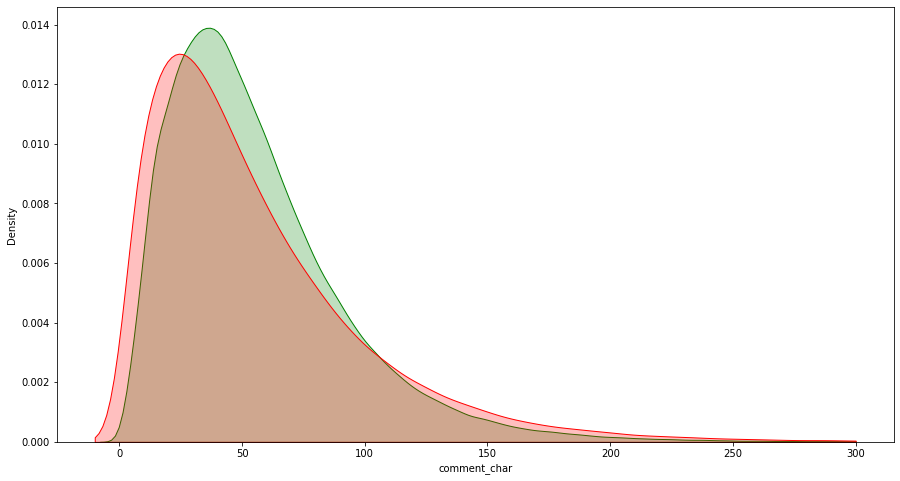

In [105]:
plt.figure(figsize=(15,8))
sns.kdeplot(cmt[cmt['label']==1]['comment_char'], shade=True, color='green', label='Sarcasmo', clip=(-10,300))
sns.kdeplot(cmt[cmt['label']==0]['comment_char'], shade=True, color = 'red', label='Não sarcasmo', clip=(-10,300))

## Pré-processamento para mineração de texto

In [117]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

1. Remoção de pontuação, stopwords e stemming (redução da palavra)

In [118]:
# FUNÇÃO QUE APLICA AS TRANSFORMAÇÕES NO TEXTO
def transfTexto(msg):
    
    # PARA CADA CARACTERE DA MENSAGEM FILTRA PONTUAÇÕES (not in string.punctuation)
    semPont = [char for char in msg if char not in string.punctuation]

    # JUNTA OS CARACTERES NOVAMENTE
    semPont = ''.join(semPont)
    
    # REMOVE STOP WORDS
    remStWords = [palavra for palavra in semPont.split() if palavra.lower() 
                  not in stopwords.words('english')]
    
    # NORMALIZA POR STEMMING E RETORNA O RESULTADO
    st = PorterStemmer()
    return [st.stem(stPalavra) for stPalavra in remStWords]

In [119]:
## Amostragem randomica
cmt = cmt.sample(frac=0.005, replace = True, random_state=1).copy()

In [120]:
cmt.count()

label                    25
comment                  25
author                   25
subreddit                25
score                    25
date                     25
parent_comment           25
comment_wcount           25
parent_comment_wcount    25
comment_char             25
parent_comment_char      25
dtype: int64

In [121]:
cmt.reset_index(inplace=True, drop=True)

In [122]:
cmt.shape

(25, 11)

2. Vetorize a mensagem por Word Count e aplique a função de transformação criada no passo anterior

In [123]:
from sklearn.feature_extraction.text import CountVectorizer
vetorizadorWC =  CountVectorizer(analyzer=transfTexto).fit(cmt['comment'])
msVetWC = vetorizadorWC.transform(cmt['comment'])
msVetWC.shape

(25, 142)

3. Transforme a matriz verotizada de WC em um dataframe e inclua o campo
label


In [124]:
dfMgVetWC = pd.DataFrame(msVetWC.todense(), columns=vetorizadorWC.get_feature_names())
dfMgVetWC = pd.concat([cmt['label'], dfMgVetWC], axis=1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [125]:
dfMgVetWC.head()

,label,1000,4,40,4000,50mm,5dsr,airport,algo,alreadi,...,weak,week,well,white,whoever,work,worthless,would,wow,yeah
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,1,1,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


4. Vetorize novamente os dados só que agora aplicando a equação TF-IDF


In [126]:
from sklearn.feature_extraction.text import TfidfTransformer
vetorizadorTfIdf = TfidfTransformer().fit(msVetWC)
msVetTfidf = vetorizadorTfIdf.transform(msVetWC)
msVetTfidf.shape

(25, 142)

5. Transforme a matriz esparsa verotizada
de TF-IDF
em um dataframe e inclua o campo
label
;

In [127]:
dfMgVetTFIDF = pd.DataFrame(msVetTfidf.todense(), columns=vetorizadorTfIdf.get_feature_names_out())
msTDIDF = pd.concat([cmt['label'], dfMgVetTFIDF], axis=1)
msTDIDF.head()

,label,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x132,x133,x134,x135,x136,x137,x138,x139,x140,x141
0,1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.447214,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,1,0.193998,0.0,0.0,0.193998,0.193998,0.193998,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.408248,0.0,0.0,0.0,0.0
